# Spatial Point Patterns

In [1]:
using Revise
import CairoMakie as MK
using PointPatterns
using Meshes, MeshViz
using AbstractGPs
using KernelFunctions

include(joinpath("..", "src", "meshes.jl"))
include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

## Simulation of spatial point patterns

Defining a area of interest.

In [2]:
outer = Point2[(0,-10),(10,0),(10,15),(0,10)]
hole1 = Point2[(2,2),(4,2),(4,4),(2,4)]
hole2 = Point2[(6,2),(8,2),(8,4),(6,4)]
D = PolyArea(outer, [hole1, hole2])

PolyArea{2,Float64}
  outer
    └─4-Ring
  inner
    └─4-Ring
    └─4-Ring

Define a Poisson process.

In [3]:
P = PoissonProcess(10)

PointPatterns.PoissonProcess{Int64}(10)

Simulate a point pattern.

In [4]:
pp = rand(P, D)

1743 PointSet{2,Float64}
  └─Point(5.652664117147601, -2.839133164661267)
  └─Point(3.397098214558115, 11.17329059153076)
  └─Point(6.638448526334232, 9.398949690039618)
  └─Point(3.8804461741189153, 5.887555004376022)
  └─Point(2.733055515865157, 10.702580366595605)
  ⋮
  └─Point(0.8523122220098047, 8.916561269560617)
  └─Point(3.6529738874540305, 0.6194093416275173)
  └─Point(2.619789675979672, -6.0259300072233435)
  └─Point(1.1831535316065729, 9.967169685186166)
  └─Point(6.238935145263862, 11.171330059126342)

Visualize.

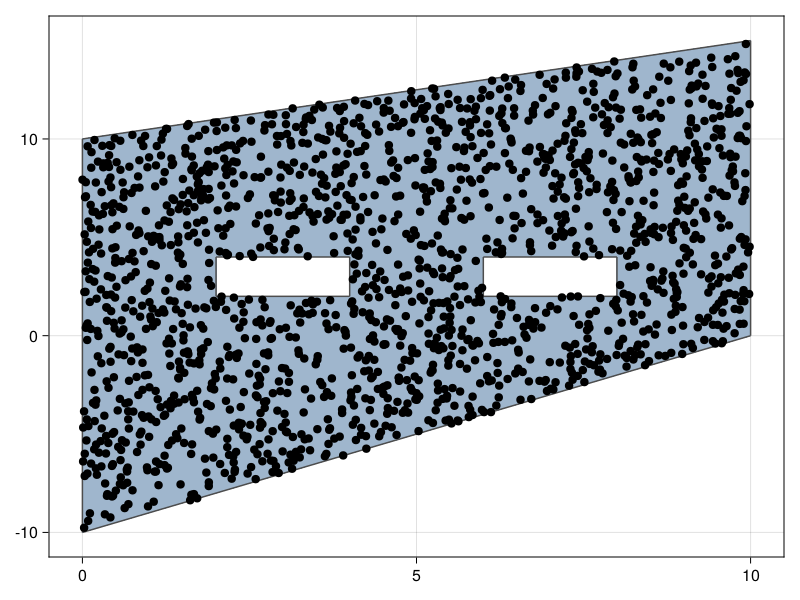

In [5]:
fig = viz(D, showfacets = true)
viz!(pp, color = :black)
fig

### Homogeneous point process

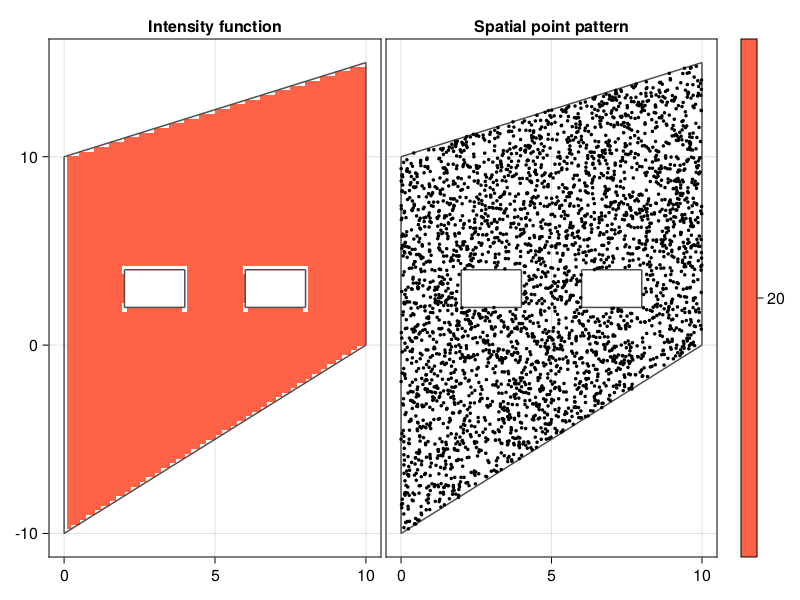

In [6]:
P = PoissonProcess(20)
fig = vizpp(P, D, palette = :tomato)

### Inhomogeneous point process

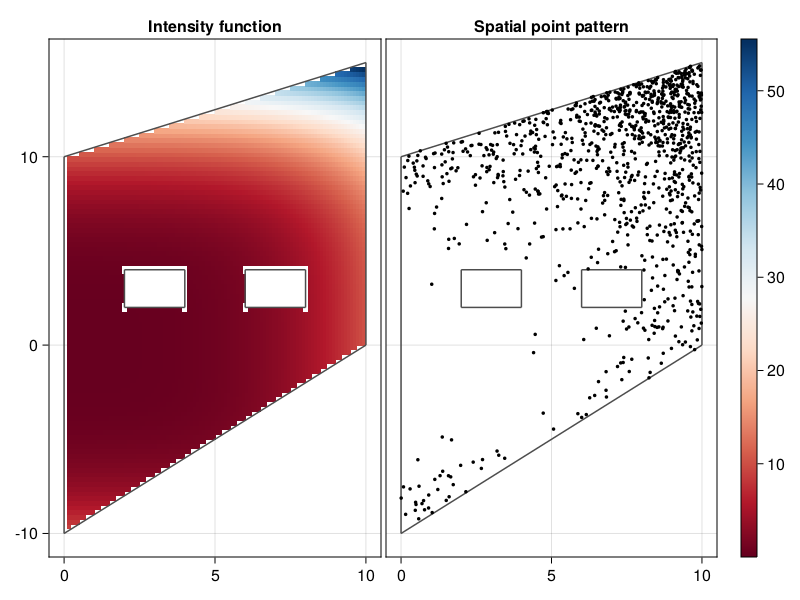

In [7]:
λ(s::Point2) = sum(0.001 * coordinates(s) .^ 4)
P = PoissonProcess(λ)
fig = vizpp(P, D, palette = :RdBu)

### Piecewise inhomogeneous point process

In [8]:
G = discretize(D)
λvec = map(x -> max(x, 1), 100 * randn(length(G)))

14-element Vector{Float64}:
   1.0
 123.18124527716432
   1.0
   1.0
   1.0
   1.0
   1.0
 194.0758075094923
  86.407492035067
   1.0
   1.0
  48.07051153672513
  14.973300206703877
 122.36696234707094

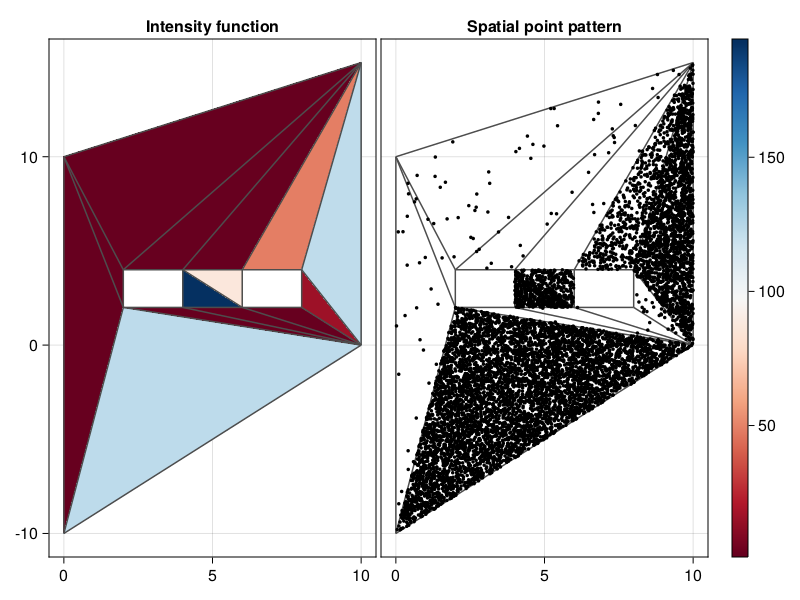

In [9]:
P = PoissonProcess(λvec)
fig = vizpp(P, G, palette = :RdBu)

### Doubly stochastic point process

In [10]:
C = CartesianGrid(extrema(D)..., dims = (120,120))
G = view(C, D) |> collect |> GeometrySet

9285 GeometrySet{2,Float64}
  └─Meshes.Quadrangle(Point(0.08333333333333333, -9.791666666666666), Point(0.16666666666666666, -9.791666666666666), Point(0.16666666666666666, -9.583333333333334), Point(0.08333333333333333, -9.583333333333334))
  └─Meshes.Quadrangle(Point(0.08333333333333333, -9.583333333333334), Point(0.16666666666666666, -9.583333333333334), Point(0.16666666666666666, -9.375), Point(0.08333333333333333, -9.375))
  └─Meshes.Quadrangle(Point(0.16666666666666666, -9.583333333333334), Point(0.25, -9.583333333333334), Point(0.25, -9.375), Point(0.16666666666666666, -9.375))
  └─Meshes.Quadrangle(Point(0.25, -9.583333333333334), Point(0.3333333333333333, -9.583333333333334), Point(0.3333333333333333, -9.375), Point(0.25, -9.375))
  └─Meshes.Quadrangle(Point(0.08333333333333333, -9.375), Point(0.16666666666666666, -9.375), Point(0.16666666666666666, -9.166666666666666), Point(0.08333333333333333, -9.166666666666666))
  ⋮
  └─Meshes.Quadrangle(Point(9.916666666666666, 14.375), 

fig = viz(G, showfacets = true)

In [11]:
W = GP(2 * Matern32Kernel() ∘ ScaleTransform(1 / 0.8))
Ws = W(coordinates.(centroid.(G)))
λvec = exp.(3 .+ rand(Ws))

9285-element Vector{Float64}:
 22.21428265088231
 15.885978837439529
 26.365468820966584
 39.232093080725896
 14.108534429135169
 22.0243817489004
 37.61864508003943
 60.73712983395449
 78.14248271190861
 89.51201466781785
  ⋮
  2.8077829170636908
  4.831830809149383
  6.592126167965187
  7.278097384789015
 10.276207077632852
  4.357098126911767
  7.193542844762725
  9.43122403145206
 12.012756217809901

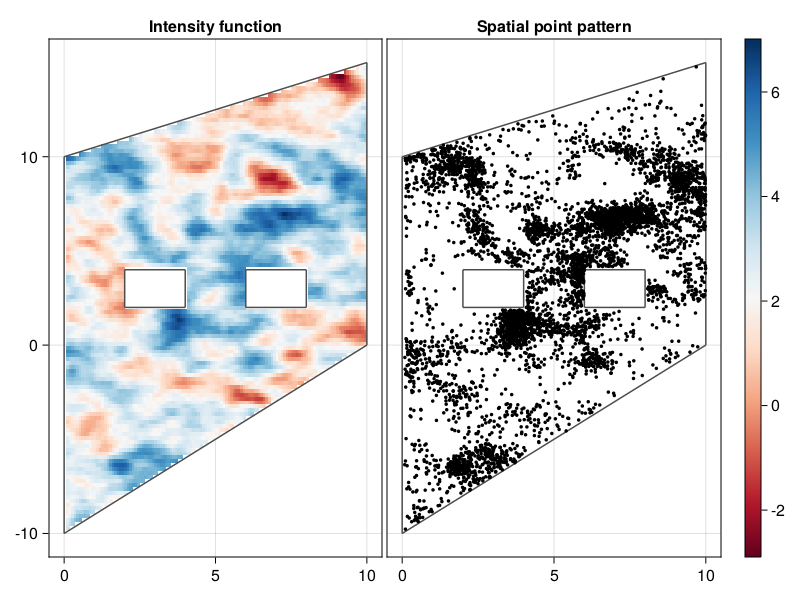

In [12]:
P = PoissonProcess(λvec)
fig = vizpp(P, G, D, palette = :RdBu, fun = log)

### Poisson clustered process

In [13]:
P = ClusterProcess(
    PoissonProcess(s -> 0.003 * sum(coordinates(s) .^ 2)),
    parent -> rand(PoissonProcess(x -> 500 * sum((x - parent).^2)), Ball(parent, 1))
    # parent -> PointSet(sample(Sphere(parent, 1), RegularSampling(60)))
)
ps = rand(P, D)

24610 PointSet{2,Float64}
  └─Point(4.56355430845757, 2.9890073655688134)
  └─Point(4.769376906784209, 2.6861982948571925)
  └─Point(4.237230430763315, 1.955838695417244)
  └─Point(4.662494794809955, 2.7902712674832606)
  └─Point(5.170656539390357, 1.8560449954493052)
  ⋮
  └─Point(8.855687771776068, 9.127145859900612)
  └─Point(8.733379232181868, 8.284542921472891)
  └─Point(8.578577991410029, 8.576983172173962)
  └─Point(8.089764211246505, 9.094705729104916)
  └─Point(7.66696508672377, 9.540778255962262)

In [14]:
fig = viz(D, showfacets = true, alpha = 0.5,
    axis = (;title = "Inhomogenegeous parent and inhomogeneneous offspring"))
viz!(ps, color = :black, pointsize = 5)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.PointSet{2, Float64}}}

### Inhibition process

In [15]:
P = InhibitionProcess(2.0)
ps = rand(P, D)

34 PointSet{2,Float64}
  └─Point(0.896514386863376, 8.777254796081582)
  └─Point(1.7451837771288266, 6.770365412915961)
  └─Point(3.6950518779080865, 4.441192102530489)
  └─Point(1.6487771513217229, -7.492229258244663)
  └─Point(0.9766010084351653, 2.8091178221303705)
  ⋮
  └─Point(9.736978172387479, 11.184268254037663)
  └─Point(3.2466330431383583, 8.86690504754143)
  └─Point(7.006840865223457, 7.9773220129590445)
  └─Point(5.767275637995725, 3.8916474726677364)
  └─Point(9.950973357778638, 0.36877008965806646)

In [16]:
fig = viz(D, showfacets = true, alpha = 0.5,
    axis = (;title = "Inhibition process"))
viz!(ps, color = :black, pointsize = 5)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.PointSet{2, Float64}}}

## Simulation on more complex domains

### Domains

In [17]:
M = CartesianGrid(Point(0,0), Point(10,10), (1.0, 1.0))
λ(s::Point2) = sum(0.001 * coordinates(s) .^ 4)
P = PoissonProcess(λ)
ps = rand(P, M)

378 PointSet{2,Float64}
  └─Point(8.675104378766761, 8.620459989294266)
  └─Point(2.587832451033125, 7.469660532878872)
  └─Point(8.302507855803217, 9.389638458372302)
  └─Point(8.133969769682771, 8.979199823118792)
  └─Point(8.583575379455667, 5.587383834404372)
  ⋮
  └─Point(1.8106260500102986, 8.936751710299202)
  └─Point(9.727563795913698, 9.885004357881074)
  └─Point(1.8706881545856695, 9.966182968020986)
  └─Point(8.435522457967105, 6.459498803207448)
  └─Point(9.327992136457429, 2.8465814418180404)

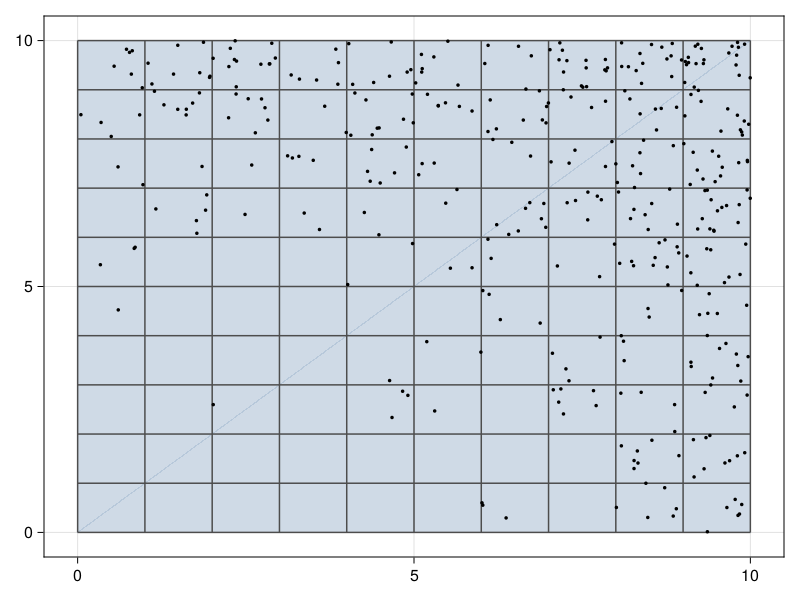

In [18]:
fig = viz(M, showfacets = true, alpha = 0.5)
viz!(ps, color = :black, pointsize = 5)
fig

### 3D

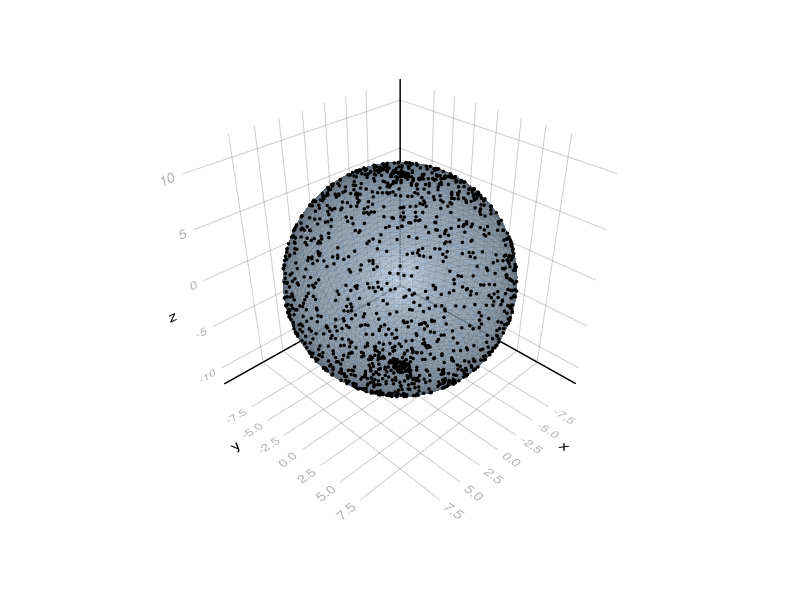

In [19]:
M = Sphere(Point(0, 0, 0), 10)
P = PoissonProcess(1)
ps = rand(P, M)

fig = viz(M, showfacets = true, alpha = 0.5)
viz!(ps, color = :black, pointsize = 5)
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*